In [1]:
Train_Dataset = r"D:\project4\GUIDE_Train.csv" # Training Dataset 
Test_Dataset = r"D:\project4\GUIDE_Test.csv" # Testing Dataset

In [3]:
import pandas as pd

# Load data in chunks to handle large file size
chunk_size = 500000  # Adjust chunk size for memory efficiency
chunks = []

# Reading the dataset in chunks
for chunk in pd.read_csv(Train_Dataset, chunksize=chunk_size, low_memory=False):
    # Optimize memory usage by downcasting data types
    for col in chunk.select_dtypes(include=['int64', 'float64']).columns:
        chunk[col] = pd.to_numeric(chunk[col], downcast='integer')
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)
del chunks  # Free up memory

# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
print(df.head())

# Display the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display the column names
print("Column Names in the Dataset:")
print(df.columns)

# Display data types and non-null counts of each column
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)

# Target variable distribution
print("\nTarget variable distribution:")
print(df['IncidentGrade'].value_counts())

First Few Rows of the Dataset:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0   180388628218      0         612   123247  2024-06-04T06:05:15.000Z   
1   455266534868     88         326   210035  2024-06-14T03:01:25.000Z   
2  1056561957389    809       58352   712507  2024-06-13T04:52:55.000Z   
3  1279900258736     92       32992   774301  2024-06-10T16:39:36.000Z   
4   214748368522    148        4359   188041  2024-06-15T01:08:07.000Z   

   DetectorId  AlertTitle           Category MitreTechniques   IncidentGrade  \
0           7           6      InitialAccess             NaN    TruePositive   
1          58          43       Exfiltration             NaN   FalsePositive   
2         423         298      InitialAccess           T1189   FalsePositive   
3           2           2  CommandAndControl             NaN  BenignPositive   
4           9          74          Execution             NaN    TruePositive   

   ... ResourceType Roles OSFamily OSVersio

In [5]:
import pandas as pd

# Load data in chunks to handle large file size
chunk_size = 500000  # Adjust chunk size for memory efficiency
chunks = []

# Reading the dataset in chunks
for chunk in pd.read_csv(Test_Dataset, chunksize=chunk_size, low_memory=False):
    # Optimize memory usage by downcasting data types
    for col in chunk.select_dtypes(include=['int64', 'float64']).columns:
        chunk[col] = pd.to_numeric(chunk[col], downcast='integer')
    chunks.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)
del chunks  # Free up memory

# Display the first few rows of the dataset
print("First Few Rows of the Dataset:")
print(df.head())

# Display the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display the column names
print("Column Names in the Dataset:")
print(df.columns)

# Display data types and non-null counts of each column
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)

# Target variable distribution
print("\nTarget variable distribution:")
print(df['IncidentGrade'].value_counts())

First Few Rows of the Dataset:
              Id  OrgId  IncidentId  AlertId                 Timestamp  \
0  1245540519230    657       11767    87199  2024-06-04T22:56:27.000Z   
1  1400159342154      3       91158   632273  2024-06-03T12:58:26.000Z   
2  1279900255923    145       32247   131719  2024-06-08T03:20:49.000Z   
3    60129547292    222       15294   917686  2024-06-12T12:07:31.000Z   
4   515396080539    363        7615     5944  2024-06-06T17:42:05.000Z   

   DetectorId  AlertTitle           Category                  MitreTechniques  \
0         524         563    LateralMovement      T1021;T1047;T1105;T1569.002   
1           2           2  CommandAndControl                              NaN   
2        2932       10807    LateralMovement  T1021;T1027.002;T1027.005;T1105   
3           0           0      InitialAccess                  T1078;T1078.004   
4          27          18          Discovery                  T1087;T1087.002   

    IncidentGrade  ...       Roles OS

Processing chunk 1...

Missing values in each column (First Chunk):
MitreTechniques      287358
IncidentGrade          2656
ActionGrouped        497090
ActionGranular       497090
EmailClusterId       494834
ThreatFamily         496080
ResourceType         499597
Roles                488662
AntispamDirection    490840
SuspicionLevel       424220
LastVerdict          382919
dtype: int64

Distribution of target variable 'IncidentGrade' (First Chunk):
IncidentGrade
BenignPositive    215445
TruePositive      174991
FalsePositive     106908
Name: count, dtype: int64


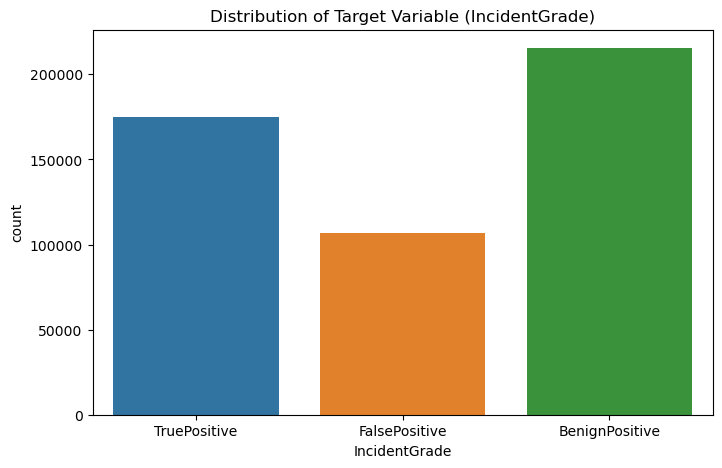

Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...
Processing chunk 10...
Processing chunk 11...
Processing chunk 12...
Processing chunk 13...
Processing chunk 14...
Processing chunk 15...
Processing chunk 16...
Processing chunk 17...
Processing chunk 18...
Processing chunk 19...
Processing chunk 20...

Combined Descriptive Statistics for Numeric Columns (averaged):
Id                    6.165253e+04
OrgId                 6.034231e+04
IncidentId            1.703026e+05
AlertId               4.969527e+05
DetectorId            6.073837e+04
AlertTitle            6.027770e+04
DeviceId              1.228830e+05
Sha256                1.489539e+05
IpAddress             2.931559e+05
Url                   1.631577e+05
AccountSid            3.450354e+05
AccountUpn            4.180538e+05
AccountObjectId       3.350238e+05
AccountName           3.524456e+05
DeviceName      

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the dataset
file_path = Train_Dataset  
chunk_size = 500000  # Adjust based on system capacity

# Data type dictionary to optimize memory usage
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32'
}

# Initialize accumulators for descriptive statistics, correlations, and outliers
desc_stats_accum = pd.DataFrame()
correlations_accum = pd.DataFrame()
outlier_counts = {}
total_outliers = 0

# Read data in chunks
chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)

# Process each chunk of data
for i, chunk in enumerate(chunks):
    print(f"Processing chunk {i + 1}...")

    # Descriptive statistics for numeric columns in the current chunk
    numeric_columns = chunk.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
    desc_stats = numeric_columns.describe()

    # Accumulate descriptive statistics
    desc_stats_accum = pd.concat([desc_stats_accum, desc_stats])

    # Correlation matrix for numeric columns in the current chunk
    correlations = numeric_columns.corr()

    # Accumulate correlations
    correlations_accum = correlations_accum.add(correlations, fill_value=0)

    # Check for missing values (first chunk only)
    if i == 0:
        missing_values = chunk.isnull().sum()
        print("\nMissing values in each column (First Chunk):")
        print(missing_values[missing_values > 0])

        # Distribution of the target variable
        print("\nDistribution of target variable 'IncidentGrade' (First Chunk):")
        print(chunk['IncidentGrade'].value_counts())

        # Visualizing the target variable distribution
        plt.figure(figsize=(8, 5))
        sns.countplot(x='IncidentGrade', data=chunk)
        plt.title('Distribution of Target Variable (IncidentGrade)')
        plt.show()

    # Detect outliers using the Interquartile Range (IQR) method
    for col in numeric_columns.columns:
        Q1 = chunk[col].quantile(0.25)
        Q3 = chunk[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = chunk[(chunk[col] < lower_bound) | (chunk[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_counts[col] = outlier_counts.get(col, 0) + outlier_count
        total_outliers += outlier_count

# Average the accumulated correlations
final_correlation_matrix = correlations_accum / (i + 1)

# Output combined descriptive statistics
print("\nCombined Descriptive Statistics for Numeric Columns (averaged):")
print(desc_stats_accum.mean())

# Output final correlation matrix
print("\nFinal Correlation Matrix for Numeric Columns (averaged):")
print(final_correlation_matrix)

# Print outlier counts for each numerical column
print("\nOutlier counts for each numerical column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Total number of outliers in the dataset
print(f"\nTotal number of outliers in the dataset: {total_outliers}")

# Concatenate all chunks for the entire dataset analysis
all_chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
df = pd.concat(all_chunks, ignore_index=True)

# Check for duplicate rows in the entire dataset
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)

# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(df.head())

# Display the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display the column names
print("\nColumn Names in the Dataset:")
print(df.columns)

# Display data types and non-null counts of each column
print("\nDataset Information:")
print(df.info())

# Check for missing values in the entire dataset
print("\nMissing values:")
print(df.isnull().sum())

# Target variable distribution for the entire dataset
print("\nTarget variable distribution:")
print(df['IncidentGrade'].value_counts())

Processing chunk 1...

Missing values in each column (First Chunk):
MitreTechniques      277888
ActionGrouped        499746
ActionGranular       499746
EmailClusterId       494927
ThreatFamily         496223
ResourceType         499651
Roles                486823
AntispamDirection    490706
SuspicionLevel       421704
LastVerdict          380313
dtype: int64

Distribution of target variable 'IncidentGrade' (First Chunk):
IncidentGrade
BenignPositive    211593
TruePositive      180069
FalsePositive     108338
Name: count, dtype: int64


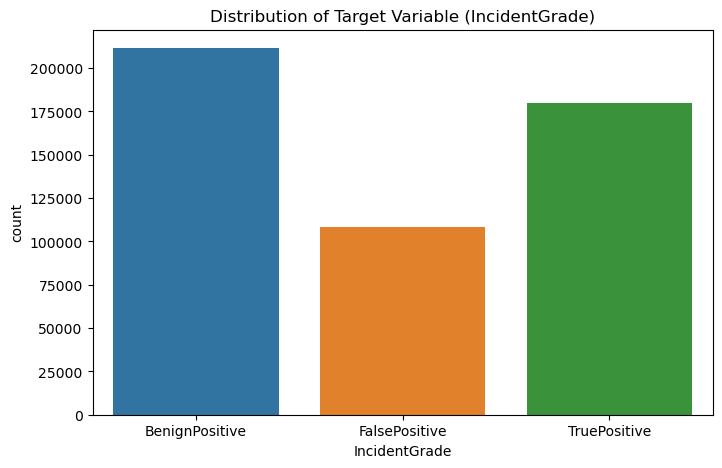

Processing chunk 2...
Processing chunk 3...
Processing chunk 4...
Processing chunk 5...
Processing chunk 6...
Processing chunk 7...
Processing chunk 8...
Processing chunk 9...

Combined Descriptive Statistics for Numeric Columns (averaged):
Id                    5.976503e+04
OrgId                 5.846353e+04
IncidentId            1.668710e+05
AlertId               4.952574e+05
DetectorId            5.886656e+04
AlertTitle            5.835896e+04
DeviceId              1.209987e+05
Sha256                1.471164e+05
IpAddress             2.913497e+05
Url                   1.612815e+05
AccountSid            3.432205e+05
AccountUpn            4.179454e+05
AccountObjectId       3.332295e+05
AccountName           3.507700e+05
DeviceName            1.567063e+05
NetworkMessageId      3.999728e+05
EmailClusterId        2.366076e+09
RegistryKey           5.863914e+04
RegistryValueName     5.800996e+04
RegistryValueData     5.815158e+04
ApplicationId         5.905303e+04
ApplicationName       5.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path for the dataset
file_path = Test_Dataset
chunk_size = 500000  # Adjust based on system capacity

# Data loading with chunking and optimized data types
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32', 'Usage' : 'object'
}

# Initialize accumulators for descriptive statistics, correlations, and outliers
desc_stats_accum = pd.DataFrame()
correlations_accum = pd.DataFrame()
outlier_counts = {}
total_outliers = 0

# Read data in chunks
chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)

# Process each chunk of data
for i, chunk in enumerate(chunks):
    print(f"Processing chunk {i + 1}...")

    # Descriptive statistics for numeric columns in the current chunk
    numeric_columns = chunk.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
    desc_stats = numeric_columns.describe()

    # Accumulate descriptive statistics
    desc_stats_accum = pd.concat([desc_stats_accum, desc_stats])

    # Correlation matrix for numeric columns in the current chunk
    correlations = numeric_columns.corr()

    # Accumulate correlations
    correlations_accum = correlations_accum.add(correlations, fill_value=0)

    # Check for missing values (first chunk only)
    if i == 0:
        missing_values = chunk.isnull().sum()
        print("\nMissing values in each column (First Chunk):")
        print(missing_values[missing_values > 0])

        # Distribution of the target variable
        print("\nDistribution of target variable 'IncidentGrade' (First Chunk):")
        print(chunk['IncidentGrade'].value_counts())

        # Visualizing the target variable distribution
        plt.figure(figsize=(8, 5))
        sns.countplot(x='IncidentGrade', data=chunk)
        plt.title('Distribution of Target Variable (IncidentGrade)')
        plt.show()

    # Detect outliers using the Interquartile Range (IQR) method
    for col in numeric_columns.columns:
        Q1 = chunk[col].quantile(0.25)
        Q3 = chunk[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = chunk[(chunk[col] < lower_bound) | (chunk[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_counts[col] = outlier_counts.get(col, 0) + outlier_count
        total_outliers += outlier_count

# Average the accumulated correlations
final_correlation_matrix = correlations_accum / (i + 1)

# Output combined descriptive statistics
print("\nCombined Descriptive Statistics for Numeric Columns (averaged):")
print(desc_stats_accum.mean())

# Output final correlation matrix
print("\nFinal Correlation Matrix for Numeric Columns (averaged):")
print(final_correlation_matrix)

# Print outlier counts for each numerical column
print("\nOutlier counts for each numerical column:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Total number of outliers in the dataset
print(f"\nTotal number of outliers in the dataset: {total_outliers}")

# Concatenate all chunks for the entire dataset analysis
all_chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
df = pd.concat(all_chunks, ignore_index=True)

# Check for duplicate rows in the entire dataset
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows in the dataset:", duplicate_count)

# Display the first few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(df.head())

# Display the shape of the dataset
print("\nShape of the dataset:", df.shape)

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display the column names
print("\nColumn Names in the Dataset:")
print(df.columns)

# Display data types and non-null counts of each column
print("\nDataset Information:")
print(df.info())

# Check for missing values in the entire dataset
print("\nMissing values:")
print(df.isnull().sum())

# Target variable distribution for the entire dataset
print("\nTarget variable distribution:")
print(df['IncidentGrade'].value_counts())


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# File path and chunk size
file_path = Train_Dataset # Replace with the actual path to your dataset
chunk_size = 500000

# Data types dictionary to optimize memory usage
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32'
}

# Read data in chunks and concatenate
chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
df = pd.concat(chunks, ignore_index=True)

# Drop columns with more than 80% missing values
threshold = 0.8
missing_percentages = df.isnull().mean()
columns_to_drop = missing_percentages[missing_percentages > threshold].index
df.drop(columns=columns_to_drop, inplace=True)

print(f"Columns dropped due to more than {threshold*100}% missing values: {columns_to_drop.tolist()}")

# Handling Missing Data
def impute_missing_values(df):
    # Impute numeric columns with median
    numeric_columns = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).columns
    for col in numeric_columns:
        if df[col].isnull().any():
            median_val = df[col].median()
            print(f"Imputing column '{col}' with median value: {median_val}")
            df[col] = df[col].fillna(median_val)
    
    # Impute categorical columns with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df[col].isnull().any():
            mode_val = df[col].mode()[0]
            print(f"Imputing column '{col}' with mode value: {mode_val}")
            df[col] = df[col].fillna(mode_val)
    
    return df

df = impute_missing_values(df)

# Handling Outliers
def remove_outliers(df, iqr_multiplier=1.5):
    numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
    for col in numeric_features.columns:
        if df[col].nunique() > 10:  # Skip columns with too few unique values
            Q1 = numeric_features[col].quantile(0.25)
            Q3 = numeric_features[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR
            before_count = df.shape[0]
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            after_count = df.shape[0]
            if before_count != after_count:
                print(f"Column '{col}' reduced from {before_count} to {after_count} rows after outlier removal.")
                if after_count == 0:
                    print(f"Warning: All values in column '{col}' were removed as outliers!")
    return df

df = remove_outliers(df, iqr_multiplier=3.0)  # More conservative IQR multiplier

# Feature Engineering: Extracting datetime features
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour

# Drop the 'Timestamp' column
df.drop(columns=['Timestamp'], inplace=True)

# List of ID columns to exclude from scaling
id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
              'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 
              'DeviceName', 'NetworkMessageId', 'EmailClusterId', 'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
              'FileName', 'FolderPath', 'ResourceIdName', 'CountryCode', 'State', 'City']

# Exclude ID columns from scaling
numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).drop(columns=id_columns, errors='ignore')

# Check the min and max before scaling
print("\nBefore Scaling:")
print(numeric_features.describe())

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
df[numeric_features.columns] = scaler.fit_transform(numeric_features)

# Check the min and max after scaling
print("\nAfter Scaling:")
print(df[numeric_features.columns].describe())

# Encoding Categorical Variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 
                       'SuspicionLevel', 'MitreTechniques', 'ThreatFamily', 
                       'ResourceType', 'Roles', 'AntispamDirection', 'LastVerdict']

for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string if necessary

# Check for columns that are fully zero after preprocessing
zero_columns = [col for col in df.columns if (df[col].dtype in ['int32', 'int16', 'float32', 'int64']) and df[col].nunique() == 1 and df[col].unique()[0] == 0]

if zero_columns:
    print("\nColumns with all zeros after preprocessing:", zero_columns)
else:
    print("\nNo columns are completely zero.")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Save processed data to CSV
df.to_csv(r'D:/project4/Training_data.csv', index=False)
print("Data preprocessing complete and saved to 'Training_data.csv'.")

Columns dropped due to more than 80.0% missing values: ['ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel']
Imputing column 'MitreTechniques' with mode value: T1078;T1078.004
Imputing column 'IncidentGrade' with mode value: BenignPositive
Imputing column 'LastVerdict' with mode value: Suspicious
Column 'OrgId' reduced from 9516837 to 8842950 rows after outlier removal.
Column 'IncidentId' reduced from 8842950 to 8298653 rows after outlier removal.
Column 'DetectorId' reduced from 8298653 to 7455901 rows after outlier removal.
Column 'AlertTitle' reduced from 7455901 to 6306388 rows after outlier removal.
Column 'DeviceId' reduced from 6306388 to 6069978 rows after outlier removal.
Column 'Sha256' reduced from 6069978 to 5660450 rows after outlier removal.
Column 'IpAddress' reduced from 5660450 to 4126832 rows after outlier removal.
Column 'Url' reduced from 4126832 to 3534349 rows after outlier removal.
C

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# File path and chunk size
file_path = Test_Dataset  # Ensure this is a valid path
chunk_size = 500000

# Data loading with chunking and optimized data types
dtype_dict = {
    'Id': 'int32', 'OrgId': 'int16', 'IncidentId': 'int32', 'AlertId': 'int32',
    'Timestamp': 'object', 'DetectorId': 'int16', 'AlertTitle': 'int16',
    'Category': 'object', 'MitreTechniques': 'object', 'IncidentGrade': 'object',
    'ActionGrouped': 'object', 'ActionGranular': 'object', 'EntityType': 'object',
    'EvidenceRole': 'object', 'DeviceId': 'int32', 'Sha256': 'int64',
    'IpAddress': 'int64', 'Url': 'int64', 'AccountSid': 'int32', 'AccountUpn': 'int32',
    'AccountObjectId': 'int32', 'AccountName': 'int32', 'DeviceName': 'int32',
    'NetworkMessageId': 'int32', 'EmailClusterId': 'float32', 'RegistryKey': 'int32',
    'RegistryValueName': 'int32', 'RegistryValueData': 'int32', 'ApplicationId': 'int32',
    'ApplicationName': 'int32', 'OAuthApplicationId': 'int32', 'ThreatFamily': 'object',
    'FileName': 'int32', 'FolderPath': 'int32', 'ResourceIdName': 'int32',
    'ResourceType': 'object', 'Roles': 'object', 'OSFamily': 'int16', 'OSVersion': 'int16',
    'AntispamDirection': 'object', 'SuspicionLevel': 'object', 'LastVerdict': 'object',
    'CountryCode': 'int16', 'State': 'int16', 'City': 'int32', 'Usage' : 'object'
}

# Read data in chunks and concatenate
chunks = pd.read_csv(file_path, chunksize=chunk_size, dtype=dtype_dict, low_memory=False)
df = pd.concat(chunks, ignore_index=True)

# Drop columns with more than 80% missing values
threshold = 0.8
missing_percentages = df.isnull().mean()
columns_to_drop = missing_percentages[missing_percentages > threshold].index
df.drop(columns=columns_to_drop, inplace=True)

print(f"Columns dropped due to more than {threshold*100}% missing values: {columns_to_drop.tolist()}")

# Handling Missing Data
def impute_missing_values(df):
    # Impute numeric columns with median
    numeric_columns = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).columns
    for col in numeric_columns:
        if df[col].isnull().any():
            median_val = df[col].median()
            print(f"Imputing column '{col}' with median value: {median_val}")
            df[col] = df[col].fillna(median_val)
    
    # Impute categorical columns with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        if df[col].isnull().any():
            mode_val = df[col].mode()[0]
            print(f"Imputing column '{col}' with mode value: {mode_val}")
            df[col] = df[col].fillna(mode_val)
    
    return df

df = impute_missing_values(df)

# Handling Outliers
def remove_outliers(df, iqr_multiplier=1.5):
    numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64'])
    for col in numeric_features.columns:
        if df[col].nunique() > 10:  # Skip columns with too few unique values
            Q1 = numeric_features[col].quantile(0.25)
            Q3 = numeric_features[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR
            before_count = df.shape[0]
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
            after_count = df.shape[0]
            if before_count != after_count:
                print(f"Column '{col}' reduced from {before_count} to {after_count} rows after outlier removal.")
                if after_count == 0:
                    print(f"Warning: All values in column '{col}' were removed as outliers!")
    return df

df = remove_outliers(df, iqr_multiplier=3.0)  # More conservative IQR multiplier

# Feature Engineering: Extracting datetime features
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour

# Drop the 'Timestamp' column
df.drop(columns=['Timestamp', 'Usage'], inplace=True) # Extra column "Usage" will affect the training in final Testing  

# List of ID columns to exclude from scaling
id_columns = ['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'DeviceId', 'Sha256', 
              'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 
              'DeviceName', 'NetworkMessageId', 'EmailClusterId', 'RegistryKey', 'RegistryValueName', 
              'RegistryValueData', 'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 
              'FileName', 'FolderPath', 'ResourceIdName', 'CountryCode', 'State', 'City']

# Exclude ID columns from scaling
numeric_features = df.select_dtypes(include=['int32', 'int16', 'float32', 'int64']).drop(columns=id_columns, errors='ignore')

# Check the min and max before scaling
print("\nBefore Scaling:")
print(numeric_features.describe())

# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
df[numeric_features.columns] = scaler.fit_transform(numeric_features)

# Check the min and max after scaling
print("\nAfter Scaling:")
print(df[numeric_features.columns].describe())

# Encoding Categorical Variables using Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 
                       'SuspicionLevel', 'MitreTechniques', 'ThreatFamily', 
                       'ResourceType', 'Roles', 'AntispamDirection', 'LastVerdict']

for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string if necessary

# Check for columns that are fully zero after preprocessing
zero_columns = [col for col in df.columns if (df[col].dtype in ['int32', 'int16', 'float32', 'int64']) and df[col].nunique() == 1 and df[col].unique()[0] == 0]

if zero_columns:
    print("\nColumns with all zeros after preprocessing:", zero_columns)
else:
    print("\nNo columns are completely zero.")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Save processed data to CSV
df.to_csv(r'D:/project4/Testing_data.csv', index=False)
print("Data preprocessing complete and saved to 'Testing_data.csv'.")

Columns dropped due to more than 80.0% missing values: ['ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel']
Imputing column 'MitreTechniques' with mode value: T1078;T1078.004
Imputing column 'LastVerdict' with mode value: Suspicious
Column 'OrgId' reduced from 4147992 to 3880026 rows after outlier removal.
Column 'IncidentId' reduced from 3880026 to 3626027 rows after outlier removal.
Column 'DetectorId' reduced from 3626027 to 3239340 rows after outlier removal.
Column 'AlertTitle' reduced from 3239340 to 2787345 rows after outlier removal.
Column 'DeviceId' reduced from 2787345 to 2690484 rows after outlier removal.
Column 'Sha256' reduced from 2690484 to 2507111 rows after outlier removal.
Column 'IpAddress' reduced from 2507111 to 1851199 rows after outlier removal.
Column 'Url' reduced from 1851199 to 1602488 rows after outlier removal.
Column 'AccountSid' reduced from 1602488 to 921596 rows after out